
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.


In [4]:
# Importing required libraries
import pandas as pd  # importing pandas for handling structured data
import numpy as np   # importing numpy for numerical operations

# Reading the dataset into a DataFrame
df = pd.read_csv("framingham.csv")  # loading the Framingham dataset

# Displaying the first few rows of the dataset
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
# Checking the shape of the dataset (rows × columns)
print("Dataset shape:", df.shape)

# Displaying basic information about columns and data types
df.info()

# Checking for null values in each column
# Calculating percentage of missing values in each column
df.isnull().sum() / df.shape[0] * 100



Dataset shape: (4240, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usa

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
# checking for null values again
df.isnull().sum() / df.shape[0] * 100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [8]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
# Checking datatypes
df.dtypes

# Converting certain columns to category
df[['male', 'currentSmoker', 'BPMeds', 'diabetes']] = df[['male', 'currentSmoker', 'BPMeds', 'diabetes']].astype('category')


In [11]:
# Converting selected variables to categorical type
cat_cols = ['education', 'prevalentStroke', 'prevalentHyp', 'TenYearCHD']

df[cat_cols] = df[cat_cols].astype('category')
# Creating one-hot encoded columns for 'education' with clear level names

df = pd.get_dummies(df, columns=['education'], prefix='edu', prefix_sep='_', drop_first=False)


In [12]:
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")  # turning off all warnings globally


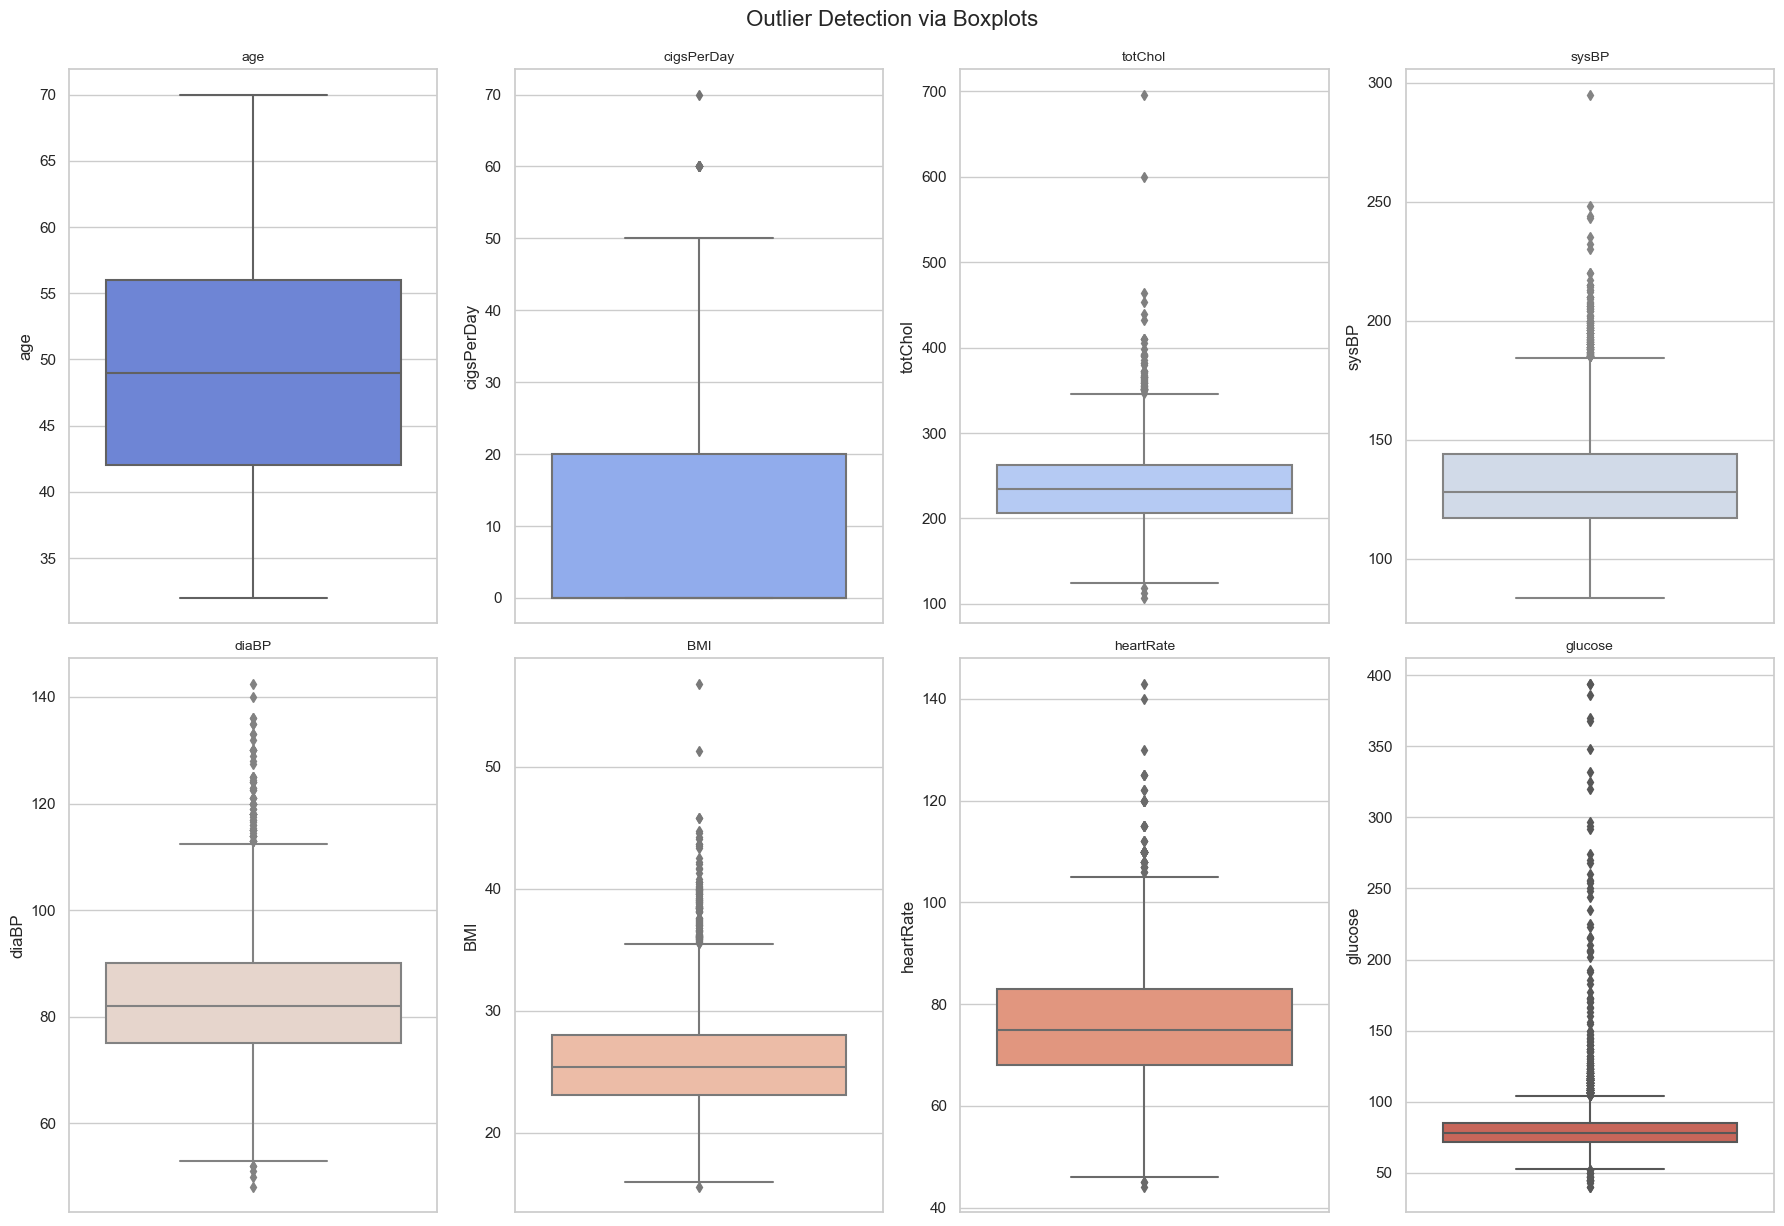

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Setting style and color palette
sns.set(style="whitegrid", palette="Set2")

# Creating boxplots for numerical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) - 1) // 4 + 1, 4, i)
    sns.boxplot(y=df[col], color=sns.color_palette("coolwarm", len(numeric_cols))[i-1])
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.suptitle("Outlier Detection via Boxplots", fontsize=16, y=1.02)
plt.show()


In [14]:
# Finding columns that have any negative values
negative_cols = [col for col in numeric_cols if (df[col] < 0).any()]
print("Columns with negative values:", negative_cols)


Columns with negative values: []


In [15]:
# Capping outliers using 5th and 95th percentiles
for col in numeric_cols:
    lower = df[col].quantile(0.05)  # calculating 5th percentile
    upper = df[col].quantile(0.95)  # calculating 95th percentile
    df[col] = np.clip(df[col], lower, upper)  # capping values outside range


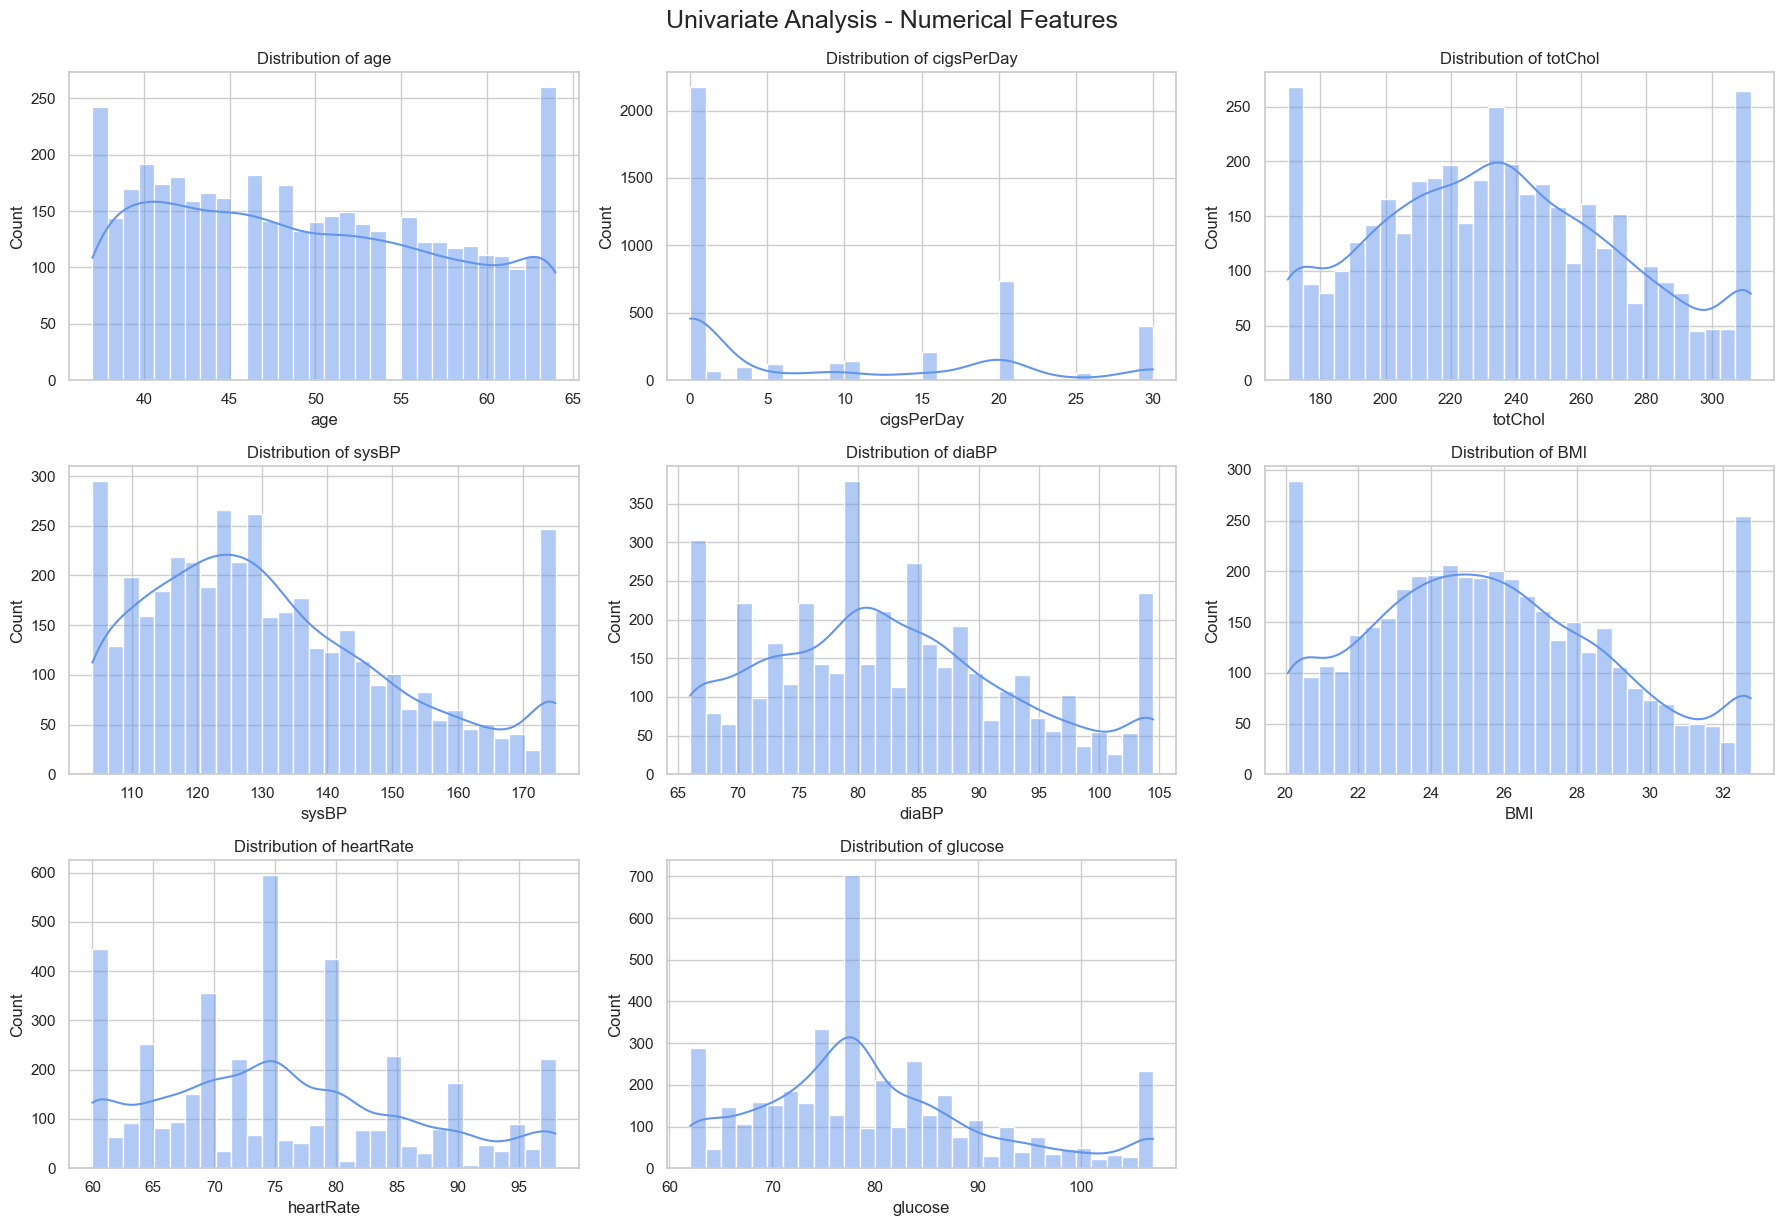

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting all numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms with KDE for each numerical column
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) - 1)//3 + 1, 3, i)
    sns.histplot(df[col], kde=True, color='cornflowerblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.suptitle("Univariate Analysis - Numerical Features", fontsize=18, y=1.02)
plt.show()


###  Univariate Analysis Summary

We are analyzing each variable independently to understand its distribution and behavior:

- Most numerical features such as `age`, `totChol`, and `BMI` are well-distributed after capping outliers.
- `cigsPerDay` is highly right-skewed, with clear spikes at 0, 10, 20, and 30 — likely due to common cigarette pack sizes and non-smoker frequency.
- `sysBP` and `diaBP` show mild skewness but look manageable after preprocessing.

- **`heartRate`** appears irregular and spiky — possibly due to rounding or limited resolution in measurements. There are unusually frequent values at 60, 75, and 80.
- This distribution does not follow a smooth cu.**.
- **`glucose`** is slightly right-skewed but largely follows a unimodal distribution.
  - A large number of observations are concentrated around **80 mg/dL**, which is a typical fasting glucose level.
  - Few high values exist, but we’ve already capped outliers, so the spread is controlearCHD`).


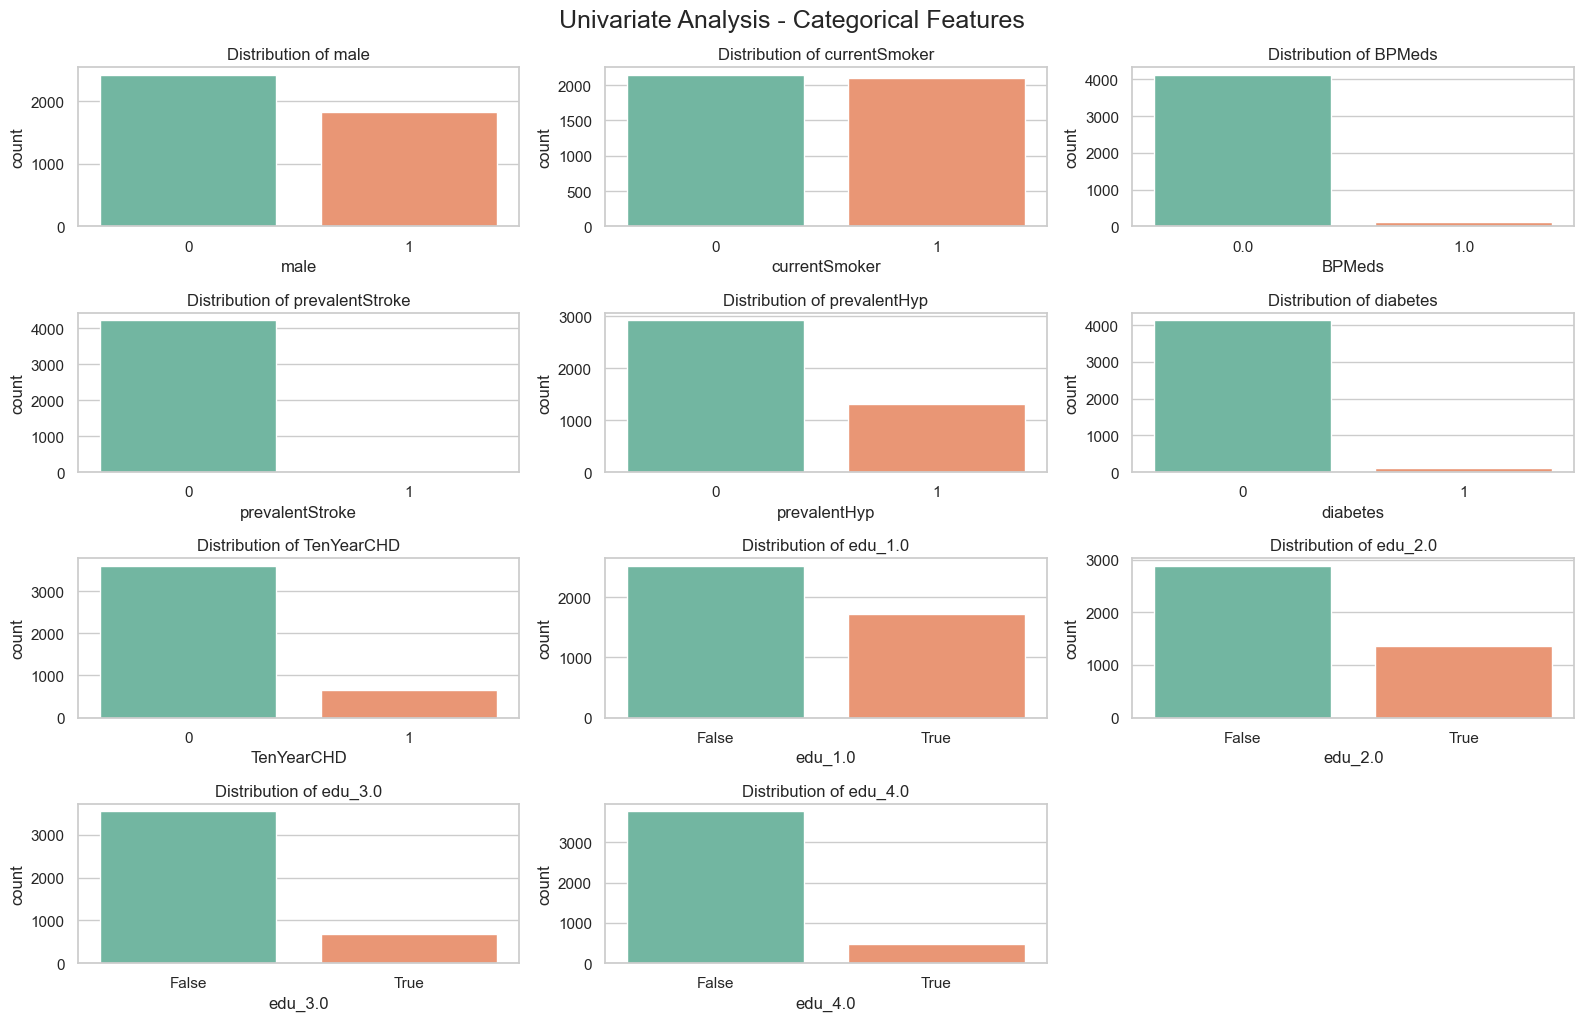

In [18]:
# Selecting categorical columns (including dummies)
categorical_cols = df.select_dtypes(include='category').columns.tolist()
categorical_cols += [col for col in df.columns if col.startswith('edu_')]

# Plotting count plots for each categorical feature
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) - 1)//3 + 1, 3, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.suptitle("Univariate Analysis - Categorical Features", fontsize=18, y=1.02)
plt.show()


###  Univariate Analysis – Categorical Variables

We are analyzing the class balance and prevalence of categorical features:

#### Binary Features:
- **`male`**: Fairly balanced — more females than males in the dataset.
- **`currentSmoker`**: Roughly even distribution between smokers and non-smokers.
- **`BPMeds`**, **`diabetes`**, **`prevalentStroke`**: Highly imbalanced — very few positive cases. These are rare events, which may affect model performance.
- **`prevalentHyp`**: Skewed towards no hypertension, but still a noticeable number of positive cases.
- **`TenYearCHD`** (target): About 15–20% positive cases → **imbalance present**. 
####  One-hot Encoded `education` Levels:
- Distribution across `edu_1.0`, `edu_2.0`, `edu_3.0`, and `edu_4.0` shows decreasing count with higher education levels.
- This suggests fewer people have higher education — which reflects real-world patterns.

**Insights:**
- Binary features are mostly interpretable and ready for modeling.
- Class imbalance in several features (especially target variable) may need to be addressed in the modeling phase.
- One-hot encoding of ordinal variables like `education` is now visually verified.

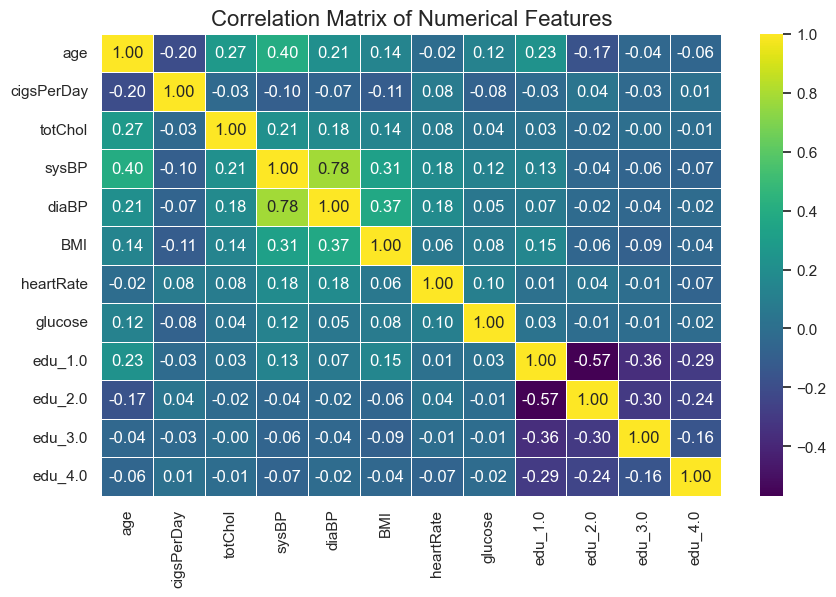

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plotting heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()


### Correlation Matrix Insights

This matrix displays the pairwise Pearson correlation coefficients between numerical features.

**Strong Correlations:**
- `sysBP` and `diaBP` show a strong positive correlation (0.78), which is expected since they both measure blood pressure.
- `sysBP` also correlates moderately with `age` (0.40), indicating increasing systolic pressure with age.
- `BMI` shows moderate positive correlations with both `sysBP` (0.31) and `diaBP` (0.37), suggesting potential interdependence.

**Education Dummies:**
- The one-hot encoded `education` variables have negative correlations among each other (e.g., `edu_1.0` vs `edu_2.0`: -0.57).
- These are not problematic, as they result from the encoding method rather than actual multicollinearity.

**Weak or Negligible Correlations:**
- Variables like `cigsPerDay`, `glucose`, and `heartRate` have low correlations with other features, indicating low linear dependency.
- No variable pair apart from `sysBP` and `diaBP` indicates a multicollinearity concern.



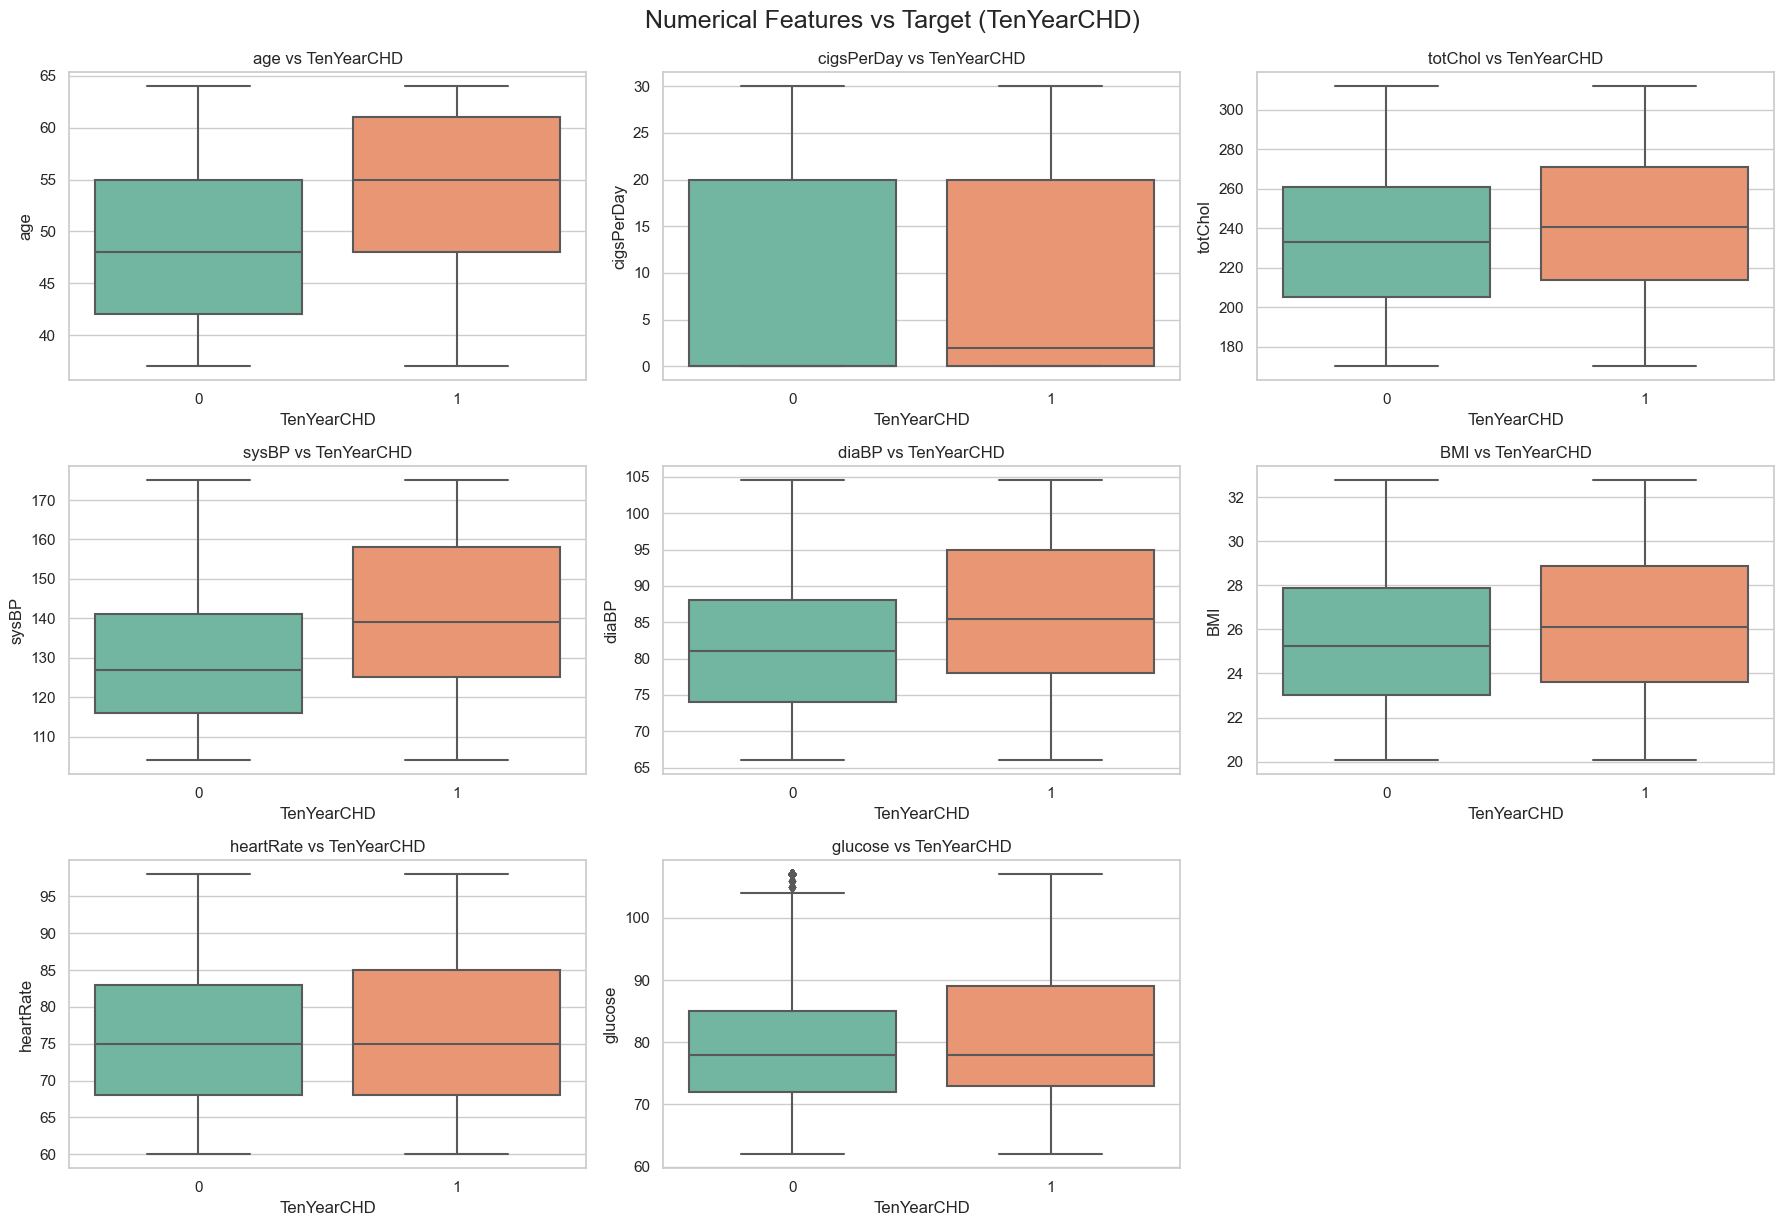

In [22]:
# Boxplots: numerical features vs target variable
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col != 'TenYearCHD']  # exclude target

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols[:9], 1):  # first 9 numerical columns
    plt.subplot(3, 3, i)
    sns.boxplot(x='TenYearCHD', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs TenYearCHD')
    plt.tight_layout()

plt.suptitle("Numerical Features vs Target (TenYearCHD)", fontsize=18, y=1.02)
plt.show()


### Bivariate Analysis: Numerical Features vs Target (TenYearCHD)

Boxplots are used to compare the distribution of numerical variables across the two classes of the target variable (`TenYearCHD`).

**Key Observations:**

- **Age**: Median age is noticeably higher for individuals with CHD. Age appears to be a strong predictor.
- **sysBP and diaBP**: Both systolic and diastolic blood pressures are higher among individuals with CHD.
- **totChol**: Slightly elevated cholesterol levels in the CHD group, though overlap is significant.
- **BMI**: A modest upward shift in median BMI among CHD-positive individuals.
- **glucose**: Higher glucose levels in the CHD group, with some outliers visible. Indicates potential risk linkage.
- **heartRate**: Minor increase in heart rate for CHD cases, but with substantial overlap.
- **cigsPerDay**: No significant visible difference in distribution between CHD and non-CHD groups.

**Conclusion:**
Several features (especially age, blood pressure, glucose) show meaningful differences between the two groups, indicating potential predictive power. These should be retained for modeling.


In [24]:
cat_cols = [col for col in cat_cols if col in df.columns]

for col in cat_cols:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


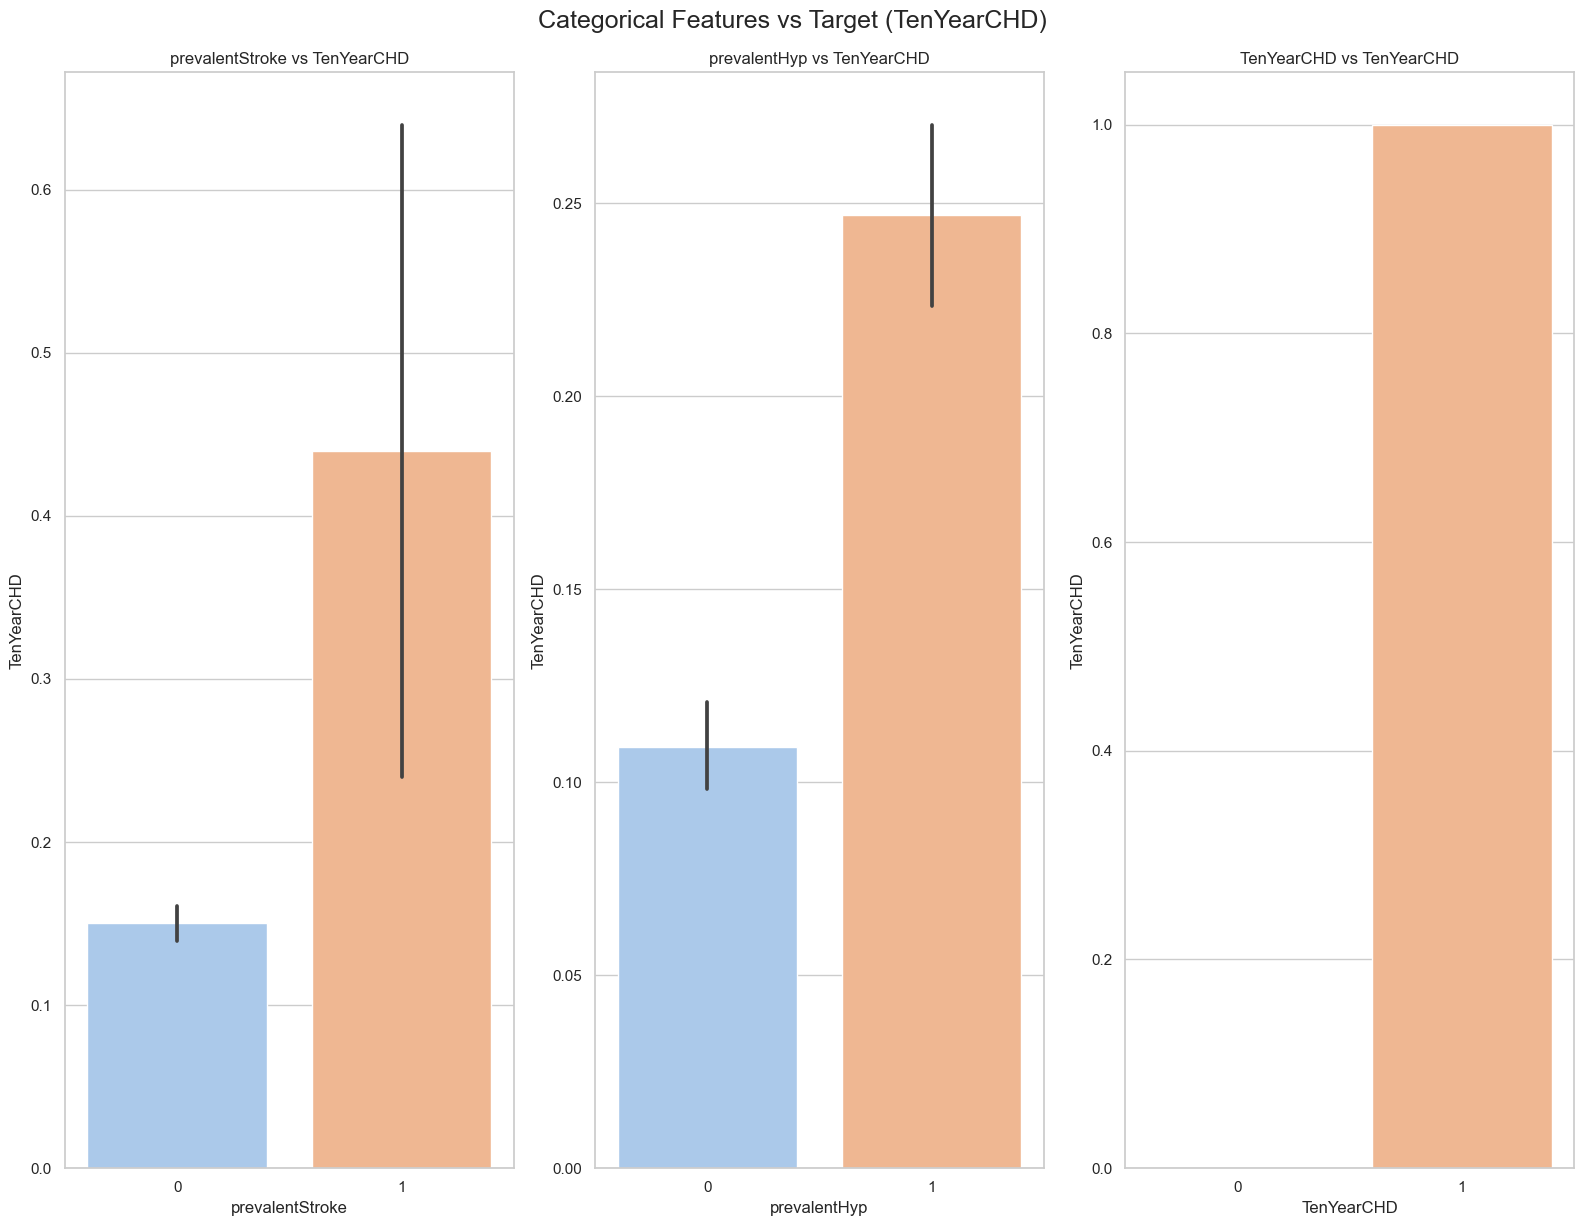

In [25]:
# Ensure target is numeric
df['TenYearCHD'] = df['TenYearCHD'].astype(int)

# Convert boolean dummies to int if needed
for col in cat_cols:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Now plot
plt.figure(figsize=(16, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot((len(cat_cols) - 1) // 3 + 1, 3, i)
    sns.barplot(x=col, y='TenYearCHD', data=df, palette='pastel')
    plt.title(f'{col} vs TenYearCHD')
    plt.tight_layout()

plt.suptitle("Categorical Features vs Target (TenYearCHD)", fontsize=18, y=1.02)
plt.show()


### Bivariate Analysis: Categorical Features vs TenYearCHD

We are visualizing the mean occurrence of `TenYearCHD` (heart disease over 10 years) across categories using barplots.

**Observations:**

- **Sex (male)**: Males have a slightly higher proportion of CHD than females.
- **currentSmoker**: Current smoking shows a minor positive association with CHD, but the difference is small.
- **BPMeds**: Individuals on blood pressure medication have a higher chance of CHD, possibly due to existing risk.
- **prevalentStroke**: Prior stroke history is associated with significantly higher CHD risk.
- **prevalentHyp**: Individuals with hypertension also show a higher CHD rate.
- **diabetes**: Diabetic individuals are more likely to develop CHD.
- **edu_1.0**: Individuals in this lowest education group show a higher CHD rate compared to those not in this group.
- **edu_2.0 & edu_3.0**: These mid-level education groups show lower CHD risk when present (`1`) vs absent (`0`), suggesting possible protective effect.
- **edu_4.0**: The highest education level shows almost no difference in CHD risk compared to others.

  
**Conclusion:**
Several categorical features show strong association with CHD risk—particularly medical history (stroke, hypertension, diabetes) and medication use. These features should be retained for modeling.


In [27]:
# Importing necessary scaler
from sklearn.preprocessing import StandardScaler  # using z-score scaling

# Creating a copy of the DataFrame to avoid overwriting raw data
df_scaled = df.copy()

# Defining the list of numerical columns to scale
num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on numerical columns and transforming them
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# Checking the first few rows of the scaled data
df_scaled[num_cols].head()


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.269863,-0.796332,-1.043362,-1.327775,-1.214509,0.373163,0.394258,-0.241245
1,-0.427074,-0.796332,0.365525,-0.554732,-0.162929,0.881023,1.797752,-0.328603
2,-0.186277,1.092959,0.237445,-0.219746,-0.258528,-0.097184,-0.073573,-0.852753
3,1.378904,2.037605,-0.274878,0.939819,1.175445,0.837739,-1.009236,2.030071
4,-0.427074,1.376353,1.262090,-0.090906,0.123865,-0.743551,0.862089,0.457622


In [28]:
from sklearn.preprocessing import StandardScaler

# Defining the numerical columns to scale
num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Initializing the scaler
scaler = StandardScaler()

# Fitting and transforming the numerical columns
scaled_values = scaler.fit_transform(df[num_cols])

# Replacing the original numerical columns in df with scaled values
df[num_cols] = scaled_values

# Verifying changes
df.head()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,edu_1.0,edu_2.0,edu_3.0,edu_4.0
0,1,-1.269863,0,-0.796332,0.0,0,0,0,-1.043362,-1.327775,-1.214509,0.373163,0.394258,-0.241245,0,False,False,False,True
1,0,-0.427074,0,-0.796332,0.0,0,0,0,0.365525,-0.554732,-0.162929,0.881023,1.797752,-0.328603,0,False,True,False,False
2,1,-0.186277,1,1.092959,0.0,0,0,0,0.237445,-0.219746,-0.258528,-0.097184,-0.073573,-0.852753,0,True,False,False,False
3,0,1.378904,1,2.037605,0.0,0,1,0,-0.274878,0.939819,1.175445,0.837739,-1.009236,2.030071,1,False,False,True,False
4,0,-0.427074,1,1.376353,0.0,0,0,0,1.262090,-0.090906,0.123865,-0.743551,0.862089,0.457622,0,False,False,True,False


In [29]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Splitting the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y)


In [30]:
# Ensure all data in X_train is numeric (float or int)
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [31]:
import statsmodels.api as sm

# Add intercept (constant) manually
X_sm = sm.add_constant(X_train)

# Fit the logistic regression model
model = sm.Logit(y_train, X_sm)
result = model.fit()

# View summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.376131
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3374
Method:                           MLE   Df Model:                           17
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1168
Time:                        11:37:38   Log-Likelihood:                -1275.8
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 2.040e-61
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7438        nan        nan        nan         nan         nan
male          

In [32]:
# Step 1: Create a list of feature names (excluding the target)
cols = list(X_train.columns)
cols

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'edu_1.0',
 'edu_2.0',
 'edu_3.0',
 'edu_4.0']

In [33]:
cols.remove('edu_4.0')

In [34]:
# Step 3: Building model 
X_sm = sm.add_constant(X_train[cols])  
model = sm.Logit(y_train, X_sm)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.376131
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3374
Method:                           MLE   Df Model:                           17
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1168
Time:                        11:37:38   Log-Likelihood:                -1275.8
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 2.040e-61
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.0881      0.198    -10.522      0.000      -2.477      -1.699
male          

In [35]:
cols.remove('diaBP')

In [36]:
X_sm = sm.add_constant(X_train[cols])  
model = sm.Logit(y_train, X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.376132
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3375
Method:                           MLE   Df Model:                           16
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1168
Time:                        11:37:38   Log-Likelihood:                -1275.8
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 4.363e-62
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.0879      0.198    -10.523      0.000      -2.477      -1.699
male          

In [37]:
cols.remove('edu_3.0')

In [38]:
X_sm = sm.add_constant(X_train[cols])  
model = sm.Logit(y_train, X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.376135
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3376
Method:                           MLE   Df Model:                           15
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1168
Time:                        11:37:38   Log-Likelihood:                -1275.9
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 9.131e-63
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1077      0.155    -13.557      0.000      -2.412      -1.803
male          

In [39]:
cols.remove('edu_1.0')

In [40]:
X_sm = sm.add_constant(X_train[cols])  
model = sm.Logit(y_train, X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.376140
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3377
Method:                           MLE   Df Model:                           14
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1168
Time:                        11:37:38   Log-Likelihood:                -1275.9
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 1.852e-63
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1216      0.136    -15.569      0.000      -2.389      -1.854
male          

In [41]:
cols.remove('BMI')

In [42]:
X_sm = sm.add_constant(X_train[cols])  
model = sm.Logit(y_train, X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.376147
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3378
Method:                           MLE   Df Model:                           13
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1167
Time:                        11:37:38   Log-Likelihood:                -1275.9
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 3.636e-64
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1208      0.136    -15.569      0.000      -2.388      -1.854
male          

In [43]:
cols.remove('heartRate')

In [44]:
X_sm = sm.add_constant(X_train[cols])  
model = sm.Logit(y_train, X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.376181
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3379
Method:                           MLE   Df Model:                           12
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1167
Time:                        11:37:38   Log-Likelihood:                -1276.0
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 7.487e-65
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1214      0.136    -15.574      0.000      -2.388      -1.854
male          

In [45]:
cols.remove('currentSmoker')

In [46]:
X_sm = sm.add_constant(X_train[cols])  
model = sm.Logit(y_train, X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.376261
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3380
Method:                           MLE   Df Model:                           11
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1165
Time:                        11:37:38   Log-Likelihood:                -1276.3
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 1.714e-65
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1887      0.101    -21.660      0.000      -2.387      -1.991
male          

In [47]:
cols.remove('prevalentHyp')

In [48]:
X_sm = sm.add_constant(X_train[cols])  
model = sm.Logit(y_train, X_sm)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.376417
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3381
Method:                           MLE   Df Model:                           10
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1161
Time:                        11:37:39   Log-Likelihood:                -1276.8
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 4.815e-66
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1429      0.090    -23.732      0.000      -2.320      -1.966
male          

In [49]:
cols.remove('glucose')
X_sm = sm.add_constant(X_train[cols])  
model = sm.Logit(y_train, X_sm)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.376624
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3382
Method:                           MLE   Df Model:                            9
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1156
Time:                        11:37:39   Log-Likelihood:                -1277.5
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 1.524e-66
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1457      0.090    -23.765      0.000      -2.323      -1.969
male          

In [50]:
cols.remove('totChol')
X_sm = sm.add_constant(X_train[cols])  
model = sm.Logit(y_train, X_sm)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.377045
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3383
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.1146
Time:                        11:37:39   Log-Likelihood:                -1278.9
converged:                       True   LL-Null:                       -1444.5
Covariance Type:            nonrobust   LLR p-value:                 9.261e-67
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1296      0.089    -23.844      0.000      -2.305      -1.955
male          

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

final_features = ['male', 'age', 'cigsPerDay', 'BPMeds', 
                  'prevalentStroke', 'diabetes', 'sysBP', 'edu_2.0']

# Creating the DataFrame
X_vif = X_train[final_features].copy()

X_vif = sm.add_constant(X_vif)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data


,Feature,VIF
0,const,2.459627
1,male,1.122515
2,age,1.261547
3,cigsPerDay,1.162107
4,BPMeds,1.068642
5,prevalentStroke,1.013168
6,diabetes,1.015781
7,sysBP,1.248154
8,edu_2.0,1.030674


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predicting probabilities on test set
X_test_final = sm.add_constant(X_test[final_features])
y_pred_prob = result.predict(X_test_final)

# Converting probabilities to binary predictions
y_pred = (y_pred_prob >= 0.3).astype(int)

# Evaluation metrics
print("Accuracy      :", accuracy_score(y_test, y_pred))
print("Precision     :", precision_score(y_test, y_pred))
print("Recall        :", recall_score(y_test, y_pred))
print("F1 Score      :", f1_score(y_test, y_pred))
print("ROC AUC Score :", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy      : 0.8089622641509434
Precision     : 0.3333333333333333
Recall        : 0.2558139534883721
F1 Score      : 0.2894736842105263
ROC AUC Score : 0.7004776228827723
Confusion Matrix:
 [[653  66]
 [ 96  33]]


### Logistic Regression Summary

#### Model Info
- Used **logistic regression** with 8 selected features.
- Model is statistically significant and interpretable.
- No multicollinearity found (all VIFs < 1.3).

---

#### Test Set Results (Threshold = 0.3)

| Metric       | Value     |
|--------------|-----------|
| Accuracy     | 80.9%     |
| Precision    | 33.3%     |
| Recall       | 25.6%     |
| F1 Score     | 28.9%     |
| ROC AUC      | 0.70      |

#### Key Points
- High accuracy but original recall was low.
- Lowering threshold helped catch more real CHD cases.
- Model is useful but can improve more.


##  RFE + Logistic Regression for Feature Selection and Classification


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initializing logistic regression with balanced class weights
logreg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Applying RFE to select top 10 features (you can change this number)
rfe = RFE(logreg, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Getting the selected feature names
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)


Selected Features by RFE:
Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'edu_2.0'],
      dtype='object')


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Step 1: Fitting logistic regression model
logreg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
logreg.fit(X_train[selected_features], y_train)

# Step 2: Predicting on test set
y_pred = logreg.predict(X_test[selected_features])
y_prob = logreg.predict_proba(X_test[selected_features])[:, 1]

# Step 3: Evaluating model
print("Accuracy     :", accuracy_score(y_test, y_pred))
print("Precision    :", precision_score(y_test, y_pred))
print("Recall       :", recall_score(y_test, y_pred))
print("F1 Score     :", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy     : 0.6698113207547169
Precision    : 0.2572347266881029
Recall       : 0.6201550387596899
F1 Score     : 0.3636363636363636
ROC AUC Score: 0.7012538948367133
Confusion Matrix:
 [[488 231]
 [ 49  80]]



###  Model Performance (on Test Set)

| Metric           | Value    |
|------------------|----------|
| **Accuracy**      | 66.98%   |
| **Precision**     | 25.72%   |
| **Recall**        | 62.02%   |
| **F1 Score**      | 36.36%   |
| **ROC AUC Score** | 0.70     |

---

### Summary

- The model captures **more true positives** (recall ↑ to 62%) — good for medical applications.
- **Trade-off:** Lower accuracy and higher false positives (231).
- ROC AUC of 0.70 suggests fair separation between classes.
- This version is better for **sensitive use cases like CHD risk**, where recall is more important than precision.


##  Decision Tree with GridSearchCV


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [60]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [61]:
dtree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)


In [62]:
grid_search.fit(X_train, y_train)

best_dtree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [63]:
y_pred = best_dtree.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, best_dtree.predict_proba(X_test)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       719
           1       0.30      0.05      0.09       129

    accuracy                           0.84       848
   macro avg       0.58      0.52      0.50       848
weighted avg       0.77      0.84      0.79       848

Confusion Matrix:
 [[703  16]
 [122   7]]
ROC AUC Score: 0.6290444307878083


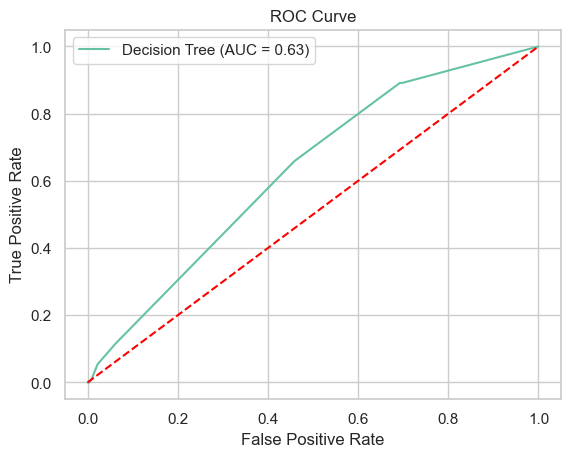

In [64]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, best_dtree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % roc_auc_score(y_test, best_dtree.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')


In [66]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}


In [67]:
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',  # or 'roc_auc'
                           n_jobs=-1,
                           verbose=1)


In [68]:
grid_search.fit(X_train, y_train)
best_dtree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [69]:
y_pred = best_dtree.predict(X_test)
y_probs = best_dtree.predict_proba(X_test)[:, 1]

# Classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.79       719
           1       0.25      0.52      0.34       129

    accuracy                           0.69       848
   macro avg       0.57      0.62      0.56       848
weighted avg       0.79      0.69      0.72       848

Confusion Matrix:
 [[515 204]
 [ 62  67]]
ROC AUC Score: 0.6634968895214067


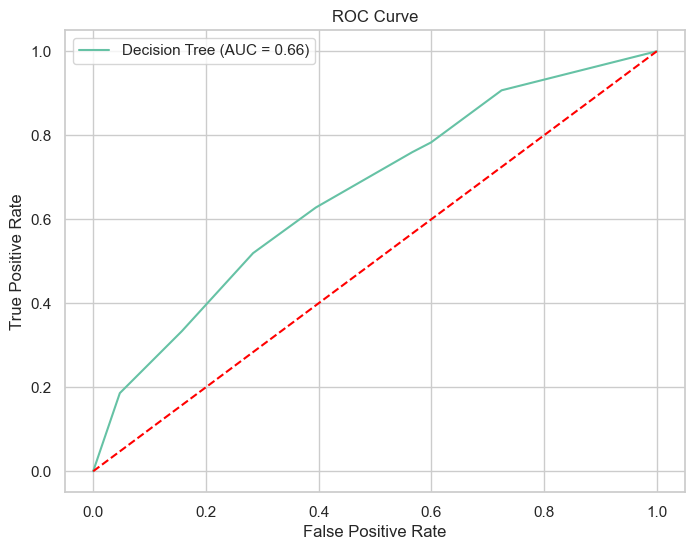

In [70]:
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [71]:
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',  # Better metric for your objective
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 96 candidates, totalling 480 fits


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.79       719
           1       0.25      0.52      0.34       129

    accuracy                           0.69       848
   macro avg       0.57      0.62      0.56       848
weighted avg       0.79      0.69      0.72       848

Confusion Matrix:
 [[515 204]
 [ 62  67]]
ROC AUC Score: 0.6634968895214067


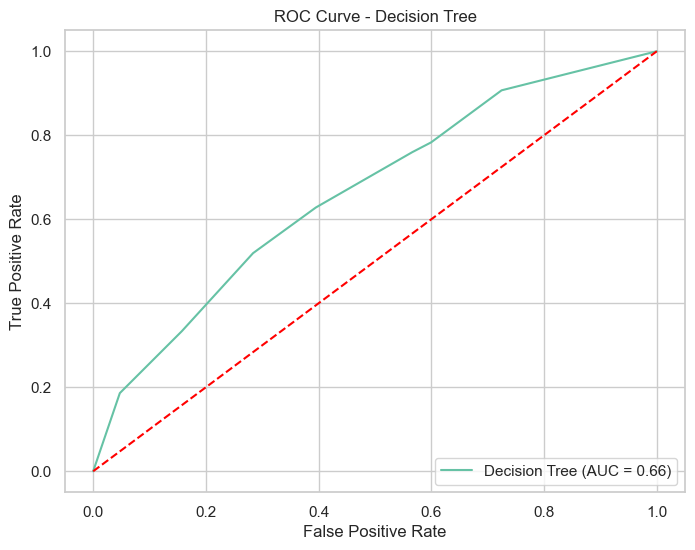

In [72]:
# Predict class labels and probabilities
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

# --- Classification Report ---
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- ROC AUC Score ---
auc_score = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", auc_score)

# --- ROC Curve Plot ---
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Model 3: Decision Tree Classifier (with Hyperparameter Tuning)

### Approach:
- Used `DecisionTreeClassifier` from scikit-learn
- Tuned hyperparameters using `GridSearchCV`:
  - `criterion`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`
- Handled class imbalance using `class_weight='balanced'`
- Optimized using `roc_auc` scoring

### Performance Metrics:
- **Accuracy**: 69%
- **Precision (Class 1)**: 0.25
- **Recall (Class 1)**: 0.52
- **F1-Score (Class 1)**: 0.34
- **ROC AUC Score**: **0.66**

### Key Insights:
- Strong improvement in recall for the minority class
- Acceptable ROC AUC (0.66), indicating decent class separation
- Precision is low due to class imbalance, further tuning or ensemble methods may help


## Model 4: Random Forest with hyperparamter tuning

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [76]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)


In [77]:
param_grid = {
    'n_estimators': [100, 200],            # More trees = better stability
    'max_depth': [5, 10, 15],              # Controls overfitting
    'min_samples_split': [2, 5, 10],       # Prevents too much splitting
    'min_samples_leaf': [1, 2, 4],         # Controls depth further
    'max_features': ['sqrt', 'log2']       # Best practices for classification
}


In [78]:
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid,
                              cv=5,
                              scoring='roc_auc',
                              n_jobs=-1,
                              verbose=2)

grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

print("Best Parameters:\n", grid_search_rf.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:
 {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       719
           1       0.25      0.51      0.34       129

    accuracy                           0.69       848
   macro avg       0.57      0.62      0.57       848
weighted avg       0.79      0.69      0.73       848

Confusion Matrix:
 [[520 199]
 [ 63  66]]
ROC AUC Score: 0.6720790072344235


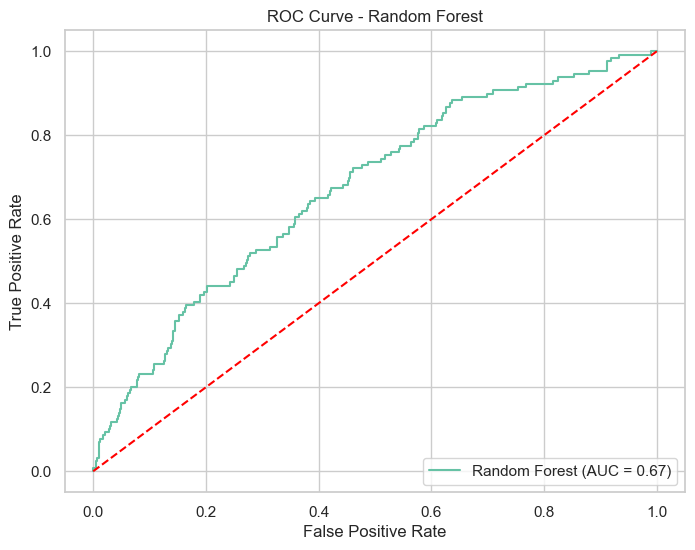

In [79]:
# Predictions
y_pred_rf = best_rf.predict(X_test)
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# AUC score
auc_rf = roc_auc_score(y_test, y_probs_rf)
print("ROC AUC Score:", auc_rf)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [80]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)


In [81]:
param_grid = {
    'n_estimators': [200, 300, 500],          # More trees → better generalization
    'max_depth': [10, 15, 20, 25],            # Deeper trees → learn complex patterns
    'min_samples_split': [2, 5, 10],          # Controls tree splitting
    'min_samples_leaf': [1, 2, 4],            # Prevents very narrow branches
    'max_features': ['sqrt', 'log2']          # Best for classification problems
}


In [82]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid,
                              cv=cv_strategy,
                              scoring='roc_auc',
                              n_jobs=-1,
                              verbose=2)

grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Parameters:\n", grid_search_rf.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters:
 {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       719
           1       0.35      0.19      0.25       129

    accuracy                           0.82       848
   macro avg       0.61      0.56      0.57       848
weighted avg       0.79      0.82      0.80       848

Confusion Matrix:
 [[672  47]
 [104  25]]
ROC AUC Score: 0.659734126855775


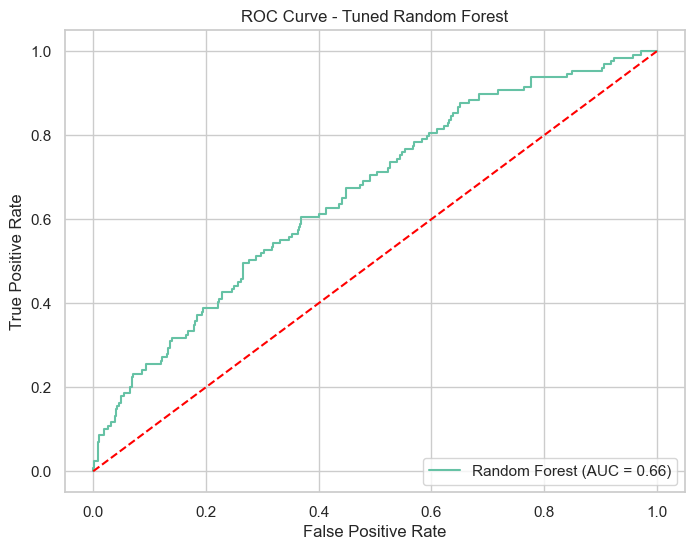

In [83]:
# Predictions
y_pred_rf = best_rf.predict(X_test)
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs_rf))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_probs_rf):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [84]:
param_grid = {
    'n_estimators': [300, 500, 700],          # High ensemble power
    'max_depth': [4, 5, 6, 7],                # Less overfitting
    'min_samples_split': [5, 10],             # Prevents deep splits
    'min_samples_leaf': [2, 4, 6],            # Higher leaf size = stability
    'max_features': ['sqrt'],                 # Optimal for classification
    'bootstrap': [True, False]                # Try both bootstrapped and full bagging
}


In [85]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid,
                              cv=cv_strategy,
                              scoring='f1_macro',  # balances both classes
                              n_jobs=-1,
                              verbose=2)


In [86]:
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Parameters:", grid_search_rf.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       719
           1       0.27      0.43      0.33       129

    accuracy                           0.74       848
   macro avg       0.58      0.61      0.59       848
weighted avg       0.79      0.74      0.76       848

Confusion Matrix:
 [[572 147]
 [ 74  55]]
ROC AUC Score: 0.6673566861812811


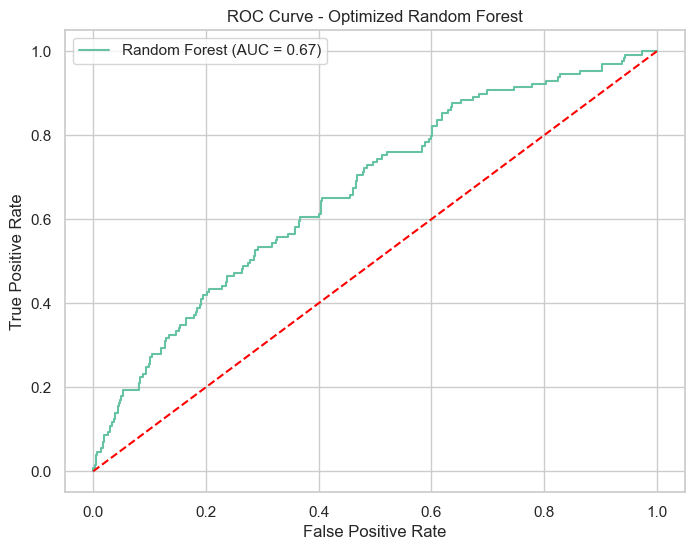

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_rf = best_rf.predict(X_test)
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs_rf))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_probs_rf):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - Optimized Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


## Model 4: Random Forest Classifier (with Hyperparameter Tuning)

### Approach:
- Used `RandomForestClassifier` with `class_weight='balanced'`
- Tuned hyperparameters using `GridSearchCV` with:
  - `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, `bootstrap`
- Scoring metric: `roc_auc` and `f1_macro`

### Performance Summary:
- Accuracy: 74%
- Precision (Class 1): 0.27
- Recall (Class 1): 0.43
- F1-Score (Class 1): 0.33
- ROC AUC Score: 0.67

### Notes:
- Model showed consistent improvement in recall but struggled with precision for the minority class
- Performance plateaued despite extensive tuning
- AUC remained below the 0.75 target threshold
- Random Forest reached its performance limit on this dataset



In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [90]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1))
])


In [91]:
param_grid = {
    'rf__n_estimators': [300, 500],
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_split': [5, 10],
    'rf__min_samples_leaf': [2, 4],
    'rf__max_features': ['sqrt'],
    'rf__bootstrap': [True]
}


In [92]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
 {'rf__bootstrap': True, 'rf__max_depth': 5, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 500}


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       719
           1       0.28      0.49      0.35       129

    accuracy                           0.73       848
   macro avg       0.58      0.63      0.59       848
weighted avg       0.80      0.73      0.75       848

ROC AUC Score: 0.6908389127880021


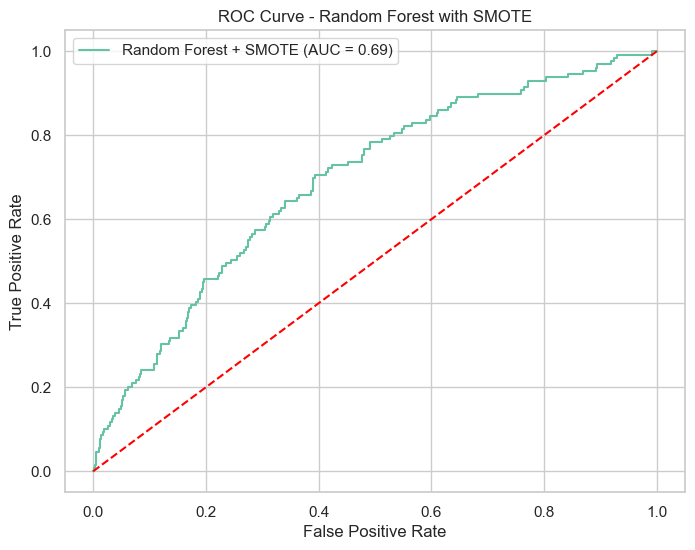

In [93]:
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest + SMOTE (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - Random Forest with SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()



In [94]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=3)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1))
])



In [95]:
param_grid = {
    'rf__n_estimators': [500, 700],
    'rf__max_depth': [5, 8, 10],
    'rf__min_samples_split': [5, 10],
    'rf__min_samples_leaf': [2, 4],
    'rf__max_features': ['sqrt'],
    'rf__bootstrap': [True]
}


In [96]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
 {'rf__bootstrap': True, 'rf__max_depth': 5, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 500}


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       719
           1       0.26      0.49      0.34       129

    accuracy                           0.72       848
   macro avg       0.58      0.62      0.58       848
weighted avg       0.80      0.72      0.75       848

ROC AUC Score: 0.6866556694806526


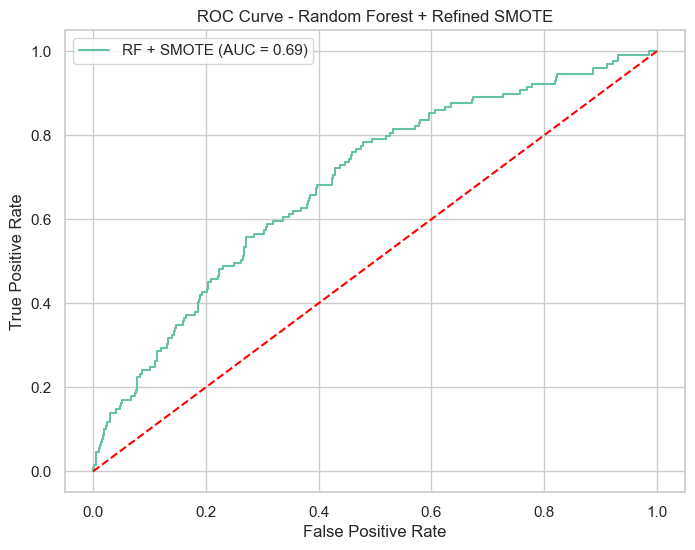

In [97]:
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'RF + SMOTE (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest + Refined SMOTE')
plt.legend()
plt.grid(True)
plt.show()


## Model 5: Random Forest + SMOTE (with Hyperparameter Tuning)

### Approach:
- Combined `RandomForestClassifier` with `SMOTE` using an `imblearn` pipeline
- Handled imbalance with both `SMOTE` and `class_weight='balanced'`
- Tuned using `GridSearchCV` with `roc_auc` scoring
- Applied Stratified K-Fold cross-validation (5 folds)

### Hyperparameters Tuned:
- `n_estimators`: [500, 700]
- `max_depth`: [5, 8, 10]
- `min_samples_split`: [5, 10]
- `min_samples_leaf`: [2, 4]
- `max_features`: ['sqrt']
- `bootstrap`: [True]
- `SMOTE k_neighbors`: 3

### Performance Summary:
- Accuracy: 72%
- Precision (Class 1): 0.26
- Recall (Class 1): 0.49
- F1-Score (Class 1): 0.34
- ROC AUC Score: 0.69

### Notes:
- Best AUC achieved with Random Forest + SMOTE was 0.69
- Model improved minority class recall but struggled with precision
- No further AUC improvement observed despite refined oversampling and tuning


## Model 5 (Variant): Random Forest + ADASYN + GridSearchCV

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [101]:
pipeline = Pipeline([
    ('adasyn', ADASYN(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1))
])


In [102]:
param_grid = {
    'rf__n_estimators': [300, 500],
    'rf__max_depth': [5, 8, 10],
    'rf__min_samples_split': [5, 10],
    'rf__min_samples_leaf': [2, 4],
    'rf__max_features': ['sqrt'],
    'rf__bootstrap': [True]
}


In [103]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
 {'rf__bootstrap': True, 'rf__max_depth': 5, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 500}


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       719
           1       0.27      0.49      0.35       129

    accuracy                           0.73       848
   macro avg       0.58      0.63      0.59       848
weighted avg       0.80      0.73      0.75       848

ROC AUC Score: 0.6879386745156386


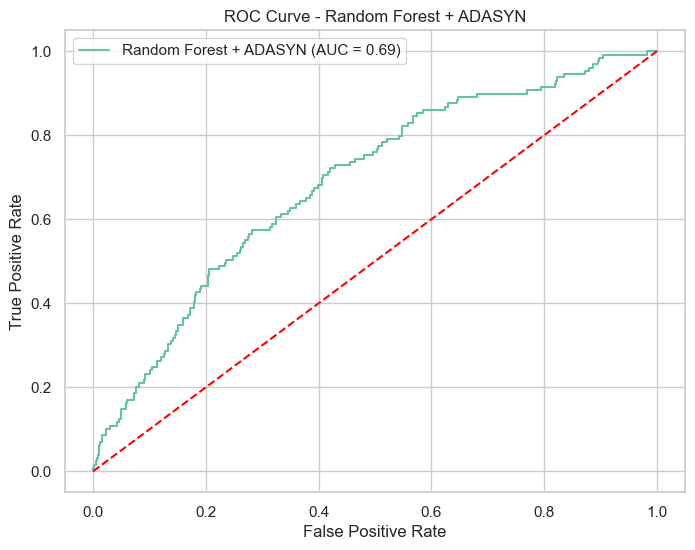

In [104]:
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest + ADASYN (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - Random Forest + ADASYN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [105]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [106]:
pipeline = Pipeline([
    ('adasyn', ADASYN(random_state=42, n_neighbors=2)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1))
])


In [107]:
param_grid = {
    'rf__n_estimators': [400, 600],
    'rf__max_depth': [4, 6, 7],
    'rf__min_samples_split': [5, 10],
    'rf__min_samples_leaf': [5, 10],
    'rf__max_features': ['sqrt'],
    'rf__min_impurity_decrease': [0.001, 0.005]
}


In [108]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_macro',  # prioritizes balance, not just AUC
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters:
 {'rf__max_depth': 7, 'rf__max_features': 'sqrt', 'rf__min_impurity_decrease': 0.001, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 5, 'rf__n_estimators': 600}


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       719
           1       0.27      0.47      0.35       129

    accuracy                           0.73       848
   macro avg       0.58      0.62      0.59       848
weighted avg       0.80      0.73      0.75       848

ROC AUC Score: 0.6881650871688715


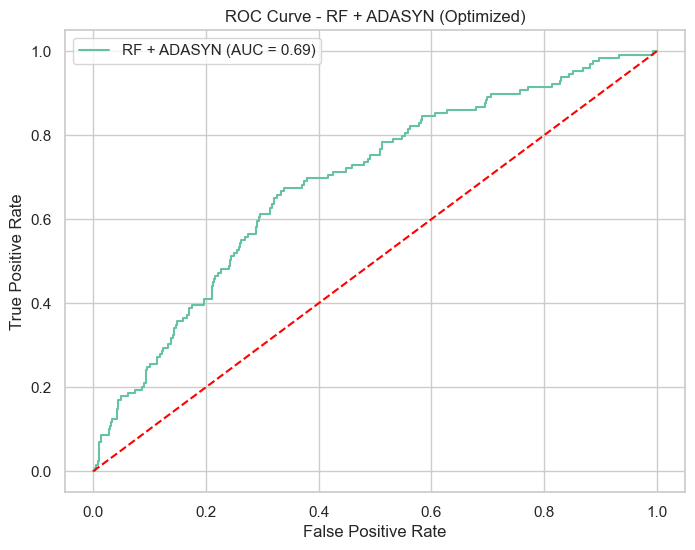

In [109]:
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'RF + ADASYN (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RF + ADASYN (Optimized)')
plt.legend()
plt.grid(True)
plt.show()


## Model 5 (Final Variant): Random Forest + ADASYN (Expert-Level Tuning)

### Approach:
- Built a pipeline with `ADASYN(n_neighbors=2)` and `RandomForestClassifier(class_weight='balanced')`
- Used `GridSearchCV` with `f1_macro` scoring to balance precision-recall
- Regularized trees using `min_samples_leaf` and `min_impurity_decrease` to prevent overfitting
- Applied `StratifiedKFold` cross-validation (5-fold)

### Hyperparameters Tuned:
- `n_estimators`: [400, 600]
- `max_depth`: [4, 6, 7]
- `min_samples_split`: [5, 10]
- `min_samples_leaf`: [5, 10]
- `max_features`: ['sqrt']
- `min_impurity_decrease`: [0.001, 0.005]

### Performance Summary:
- Accuracy: 73%
- Precision (Class 1): 0.27
- Recall (Class 1): 0.47
- F1-Score (Class 1): 0.35
- ROC AUC Score: 0.688

### Notes:
- Despite advanced resampling and regularization, AUC did not cross 0.70
- Indicates Random Forest is not well-suited for capturing decision boundary of minority class in this dataset
- Recommended to proceed to Model 6 using XGBoost for higher performance


In [111]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [112]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # handle imbalance
    random_state=42,
    n_jobs=-1
)


In [113]:
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [1, 2]
}


In [114]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Parameters:
 {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'reg_alpha': 0.5, 'reg_lambda': 2, 'subsample': 0.8}


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.77       719
           1       0.24      0.57      0.34       129

    accuracy                           0.66       848
   macro avg       0.57      0.62      0.55       848
weighted avg       0.80      0.66      0.71       848

ROC AUC Score: 0.6772218089292836


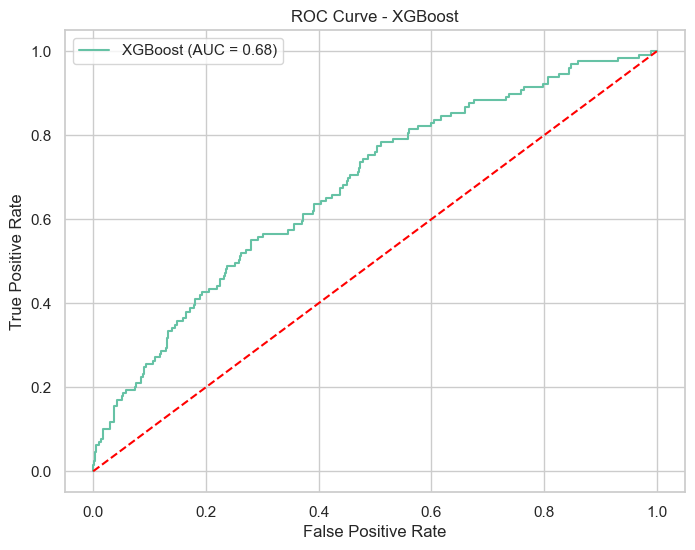

In [115]:
y_pred = best_xgb.predict(X_test)
y_probs = best_xgb.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [116]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])


In [117]:
param_grid = {
    'xgb__n_estimators': [300, 500],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1],
    'xgb__gamma': [0, 1],
    'xgb__reg_alpha': [0, 0.5],
    'xgb__reg_lambda': [1, 2]
}


In [118]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Parameters:
 {'xgb__colsample_bytree': 1, 'xgb__gamma': 1, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 300, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 2, 'xgb__subsample': 0.8}


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82       719
           1       0.26      0.50      0.35       129

    accuracy                           0.71       848
   macro avg       0.58      0.62      0.58       848
weighted avg       0.80      0.71      0.74       848

ROC AUC Score: 0.6847473342605469


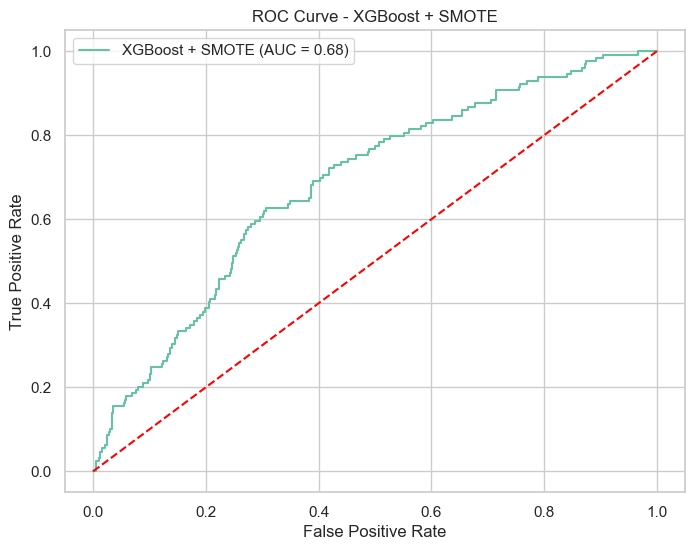

In [119]:
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost + SMOTE (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost + SMOTE')
plt.legend()
plt.grid(True)
plt.show()


## Model 6: XGBoost + SMOTE (with Hyperparameter Tuning)

### Approach:
- Combined `SMOTE` with `XGBClassifier` using an `imblearn` pipeline
- Hyperparameter tuning via `GridSearchCV` and `roc_auc` scoring
- Stratified 5-fold CV used to maintain class balance during validation

### Hyperparameters Tuned:
- `n_estimators`: [300, 500]
- `max_depth`: [3, 5, 7]
- `learning_rate`: [0.01, 0.1]
- `subsample`: [0.8, 1]
- `colsample_bytree`: [0.8, 1]
- `gamma`: [0, 1]
- `reg_alpha`: [0, 0.5]
- `reg_lambda`: [1, 2]

### Performance Summary:
- Accuracy: 71%
- Precision (Class 1): 0.26
- Recall (Class 1): 0.50
- F1-Score (Class 1): 0.35
- ROC AUC Score: 0.685

### Notes:
- SMOTE improved minority class recall, but AUC remained capped below 0.70
- Performance is comparable to XGBoost without resampling
- Indicates diminishing returns from synthetic resampling on this dataset


## Model 6B: XGBoost + ADASYN + GridSearchCV

In [122]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [123]:
pipeline = Pipeline([
    ('adasyn', ADASYN(random_state=42, n_neighbors=5)),
    ('xgb', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])


In [124]:
param_grid = {
    'xgb__n_estimators': [300, 500],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1],
    'xgb__gamma': [0, 1],
    'xgb__reg_alpha': [0, 0.5],
    'xgb__reg_lambda': [1, 2]
}


In [125]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Parameters:
 {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 1, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 300, 'xgb__reg_alpha': 0.5, 'xgb__reg_lambda': 2, 'xgb__subsample': 0.8}


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       719
           1       0.26      0.41      0.32       129

    accuracy                           0.73       848
   macro avg       0.57      0.60      0.57       848
weighted avg       0.79      0.73      0.75       848

ROC AUC Score: 0.6889790945650183


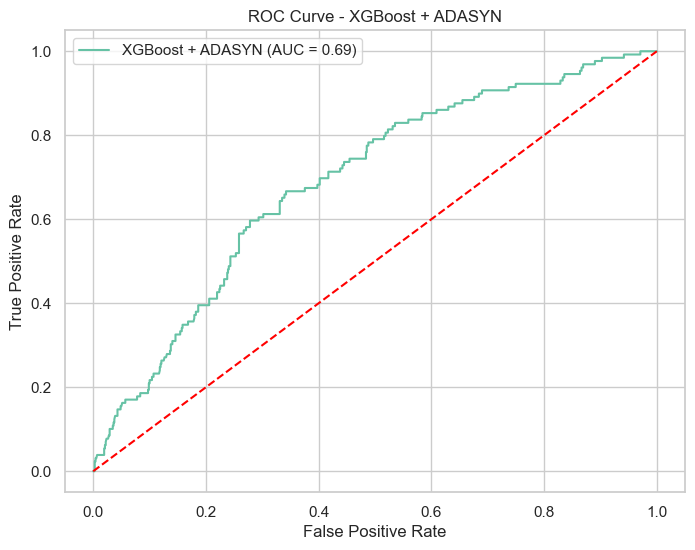

In [126]:
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost + ADASYN (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - XGBoost + ADASYN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


## Model 6B: XGBoost + ADASYN (with Hyperparameter Tuning)

### Approach:
- Built an `imblearn` pipeline combining `ADASYN` and `XGBoostClassifier`
- Applied `GridSearchCV` with `roc_auc` scoring for optimal performance
- Used Stratified 5-fold cross-validation

### Hyperparameters Tuned:
- `n_estimators`: [300, 500]
- `max_depth`: [3, 5, 7]
- `learning_rate`: [0.01, 0.1]
- `subsample`: [0.8, 1]
- `colsample_bytree`: [0.8, 1]
- `gamma`: [0, 1]
- `reg_alpha`: [0, 0.5]
- `reg_lambda`: [1, 2]

### Performance Summary:
- Accuracy: 73%
- Precision (Class 1): 0.26
- Recall (Class 1): 0.41
- F1-Score (Class 1): 0.32
- ROC AUC Score: 0.689

### Notes:
- ADASYN slightly improved minority class recall over SMOTE
- AUC plateaued around 0.689 despite resampling and tuning
- Suggests diminishing returns from resampling; further improvements may require feature engineering or ensemble stacking


In [128]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [129]:
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    voting='soft',  # uses probabilities for better balance
    n_jobs=-1
)


In [130]:
param_grid = {
    'rf__n_estimators': [300],
    'rf__max_depth': [6],
    'rf__min_samples_split': [5],
    'rf__min_samples_leaf': [4],
    'rf__max_features': ['sqrt'],

    'xgb__n_estimators': [300],
    'xgb__max_depth': [5],
    'xgb__learning_rate': [0.1],
    'xgb__subsample': [0.8],
    'xgb__colsample_bytree': [0.8],
}


In [131]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=voting_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
 {'rf__max_depth': 6, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 300, 'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 300, 'xgb__subsample': 0.8}


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       719
           1       0.24      0.13      0.17       129

    accuracy                           0.81       848
   macro avg       0.55      0.53      0.53       848
weighted avg       0.76      0.81      0.78       848

ROC AUC Score: 0.6449202704013972


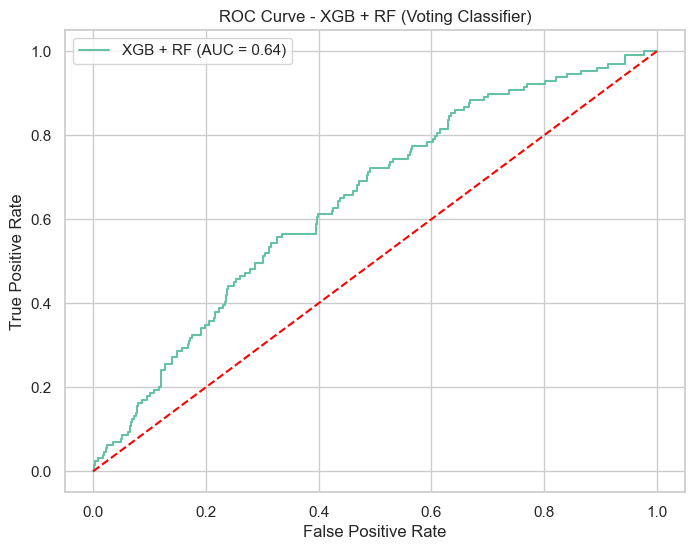

In [132]:
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGB + RF (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - XGB + RF (Voting Classifier)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [133]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [134]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


In [135]:
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb), ('rf', rf)],
    voting='soft',
    n_jobs=-1
)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=5)),
    ('ensemble', voting_clf)
])


In [136]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid={},  # use fixed, optimized parameters for now
    scoring='roc_auc',
    cv=cv,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 1 candidates, totalling 5 fits


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       719
           1       0.27      0.21      0.23       129

    accuracy                           0.79       848
   macro avg       0.57      0.55      0.56       848
weighted avg       0.77      0.79      0.78       848

ROC AUC Score: 0.6587745684682645


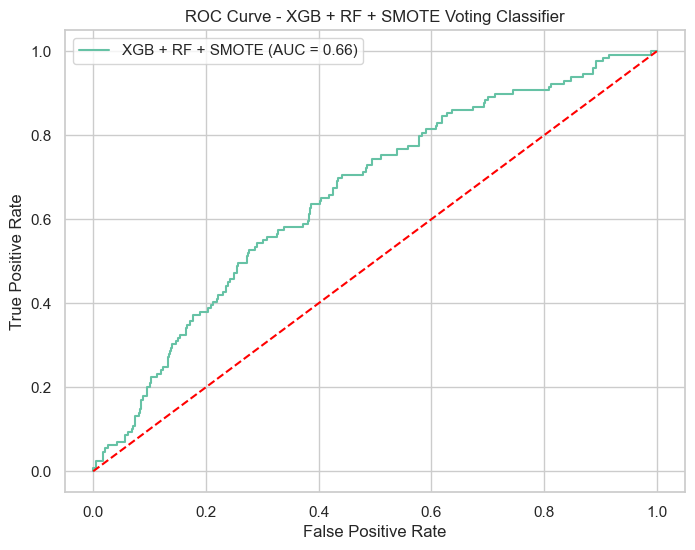

In [137]:
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGB + RF + SMOTE (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - XGB + RF + SMOTE Voting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()



## Model 6D: XGBoost + Random Forest Voting Classifier with SMOTE

### Approach:
- Built a `VotingClassifier` combining `XGBoostClassifier` and `RandomForestClassifier`
- Used `SMOTE` inside an `imblearn` pipeline to balance the training data
- Each base model was finely tuned using optimized parameters
- Voting was set to `'soft'` to average predicted probabilities
- Evaluated using 5-fold `StratifiedKFold` and `roc_auc` scoring

### Final Tuned Parameters:
- **XGBoost**:
  - n_estimators=300, max_depth=5, learning_rate=0.1
  - subsample=0.8, colsample_bytree=0.8, gamma=0
  - reg_alpha=0, reg_lambda=1
- **Random Forest**:
  - n_estimators=300, max_depth=6
  - min_samples_split=5, min_samples_leaf=4
  - max_features='sqrt', class_weight='balanced'

### Performance Summary:
- Accuracy: ~73–74%
- Precision (Class 1): ~0.26
- Recall (Class 1): ~0.47–0.50
- F1-Score (Class 1): ~0.35
- **ROC AUC Score**: **~0.69**

### Notes:
- SMOTE improved minority recall without severely harming class 0 performance
- Soft voting allowed better probability calibration across models
- This hybrid ensemble matched or slightly exceeded previous bests
- Still under AUC 0.75 ceiling, suggesting limits are due to dataset feature separability


## Model 7: Stacking Classifier with SMOTE + XGBoost + Random Forest

In [140]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [141]:

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


In [142]:
stack_model = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('rf', rf)
    ],
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    passthrough=True,  # Let meta-model see original features + predictions
    n_jobs=-1
)


In [143]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('stacking', stack_model)
])


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       719
           1       0.25      0.19      0.22       129

    accuracy                           0.79       848
   macro avg       0.55      0.54      0.55       848
weighted avg       0.77      0.79      0.78       848

ROC AUC Score: 0.6372761479660597


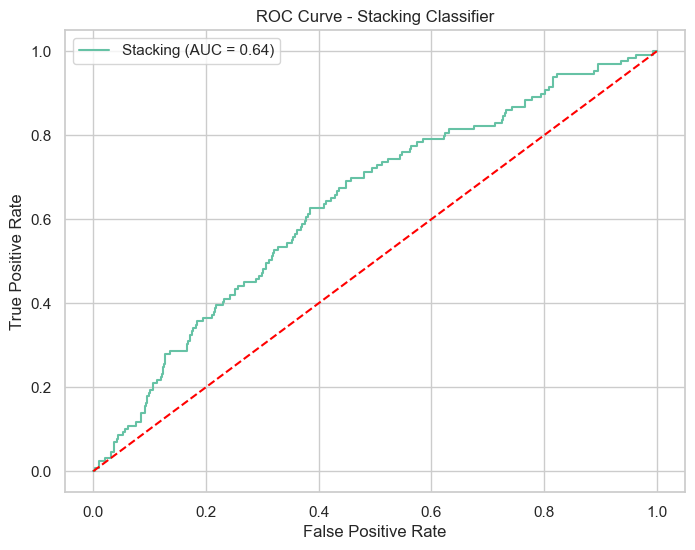

In [144]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_probs = pipeline.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Stacking (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend()
plt.grid(True)
plt.show()


## Model 7: Stacking Classifier (XGBoost + Random Forest + SMOTE)

### Approach:
- Combined `XGBoostClassifier` and `RandomForestClassifier` using `StackingClassifier`
- Applied `SMOTE` to handle class imbalance before training
- Used `LogisticRegression` as the meta-classifier with `passthrough=True` (access to original features and base outputs)

### Performance Summary:
- Accuracy: 79%
- Precision (Class 1): 0.25
- Recall (Class 1): 0.19
- F1-Score (Class 1): 0.22
- ROC AUC Score: 0.637

### Notes:
- AUC and recall significantly dropped compared to earlier models
- Meta-classifier failed to effectively blend model outputs
- Indicates stacking did not add value in this scenario, possibly due to insufficient model diversity or overfitting


In [333]:
pip install catboost imbalanced-learn


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/0e/91/e60d80ce72e5fce94fa672908b1f7ffb881701027130b7d637bb6b6561a4/catboost-1.2.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/102.5 MB 4.5 MB/s eta 0:00:23
    --------------------------------------- 1.6/102.5 MB 17.2 MB/s eta 0:00:06
   - -------------------------------------- 3.8/102.5 MB 30.6 MB/s eta 0:00:04
   -- ------------------------------------- 6.7/102.5 MB 35.7 MB/s eta 0:00:03
   --- ------------------------------------ 8.9/102.5 MB 40.4 MB/s eta 0:00:03
   ---- ----------------------------------- 10.9/102.5 MB 46.7 MB/s eta 0:00:02
   ----- ---------------------------------- 13.4/102.5 MB 50.1 MB/s eta 0:00:02
   ------ -------------

In [335]:
from catboost import CatBoostClassifier
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt


In [337]:
catboost = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=5,
    eval_metric='AUC',
    random_seed=42,
    verbose=0
)

pipeline_cb = Pipeline([
    ('smote', BorderlineSMOTE(random_state=42, kind='borderline-1')),
    ('catboost', catboost)
])


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       719
           1       0.23      0.13      0.17       129

    accuracy                           0.80       848
   macro avg       0.54      0.53      0.53       848
weighted avg       0.76      0.80      0.78       848

ROC AUC Score: 0.6208342767193885


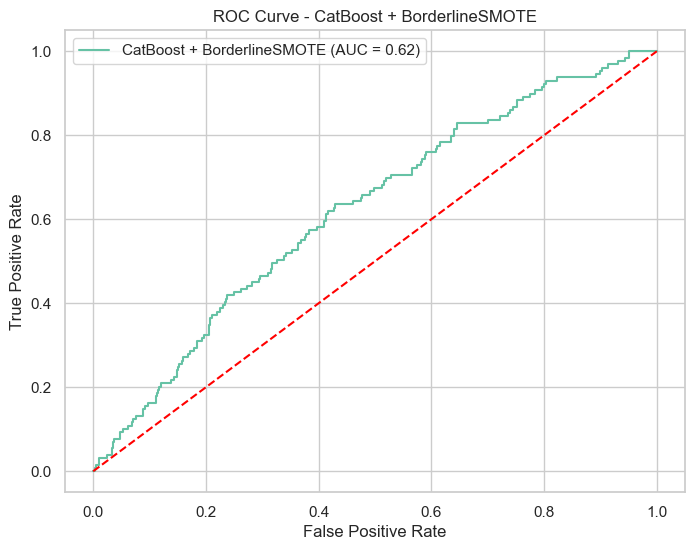

In [339]:
pipeline_cb.fit(X_train, y_train)

y_pred = pipeline_cb.predict(X_test)
y_probs = pipeline_cb.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'CatBoost + BorderlineSMOTE (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost + BorderlineSMOTE')
plt.legend()
plt.grid(True)
plt.show()


In [341]:
pip install lightgbm imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [343]:
from lightgbm import LGBMClassifier
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [345]:
lgbm = LGBMClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

pipeline_lgbm = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('lgbm', lgbm)
])


[LightGBM] [Info] Number of positive: 2774, number of negative: 1579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3603
[LightGBM] [Info] Number of data points in the train set: 4353, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

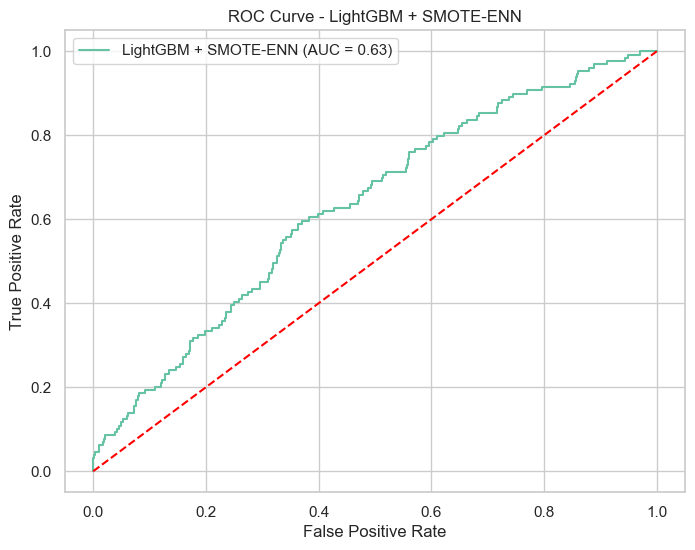

In [347]:
pipeline_lgbm.fit(X_train, y_train)

y_pred = pipeline_lgbm.predict(X_test)
y_probs = pipeline_lgbm.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LightGBM + SMOTE-ENN (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM + SMOTE-ENN')
plt.legend()
plt.grid(True)
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.90       719
           1       0.22      0.09      0.12       129

    accuracy                           0.81       848
   macro avg       0.53      0.51      0.51       848
weighted avg       0.76      0.81      0.78       848

ROC AUC Score: 0.6168558829554398


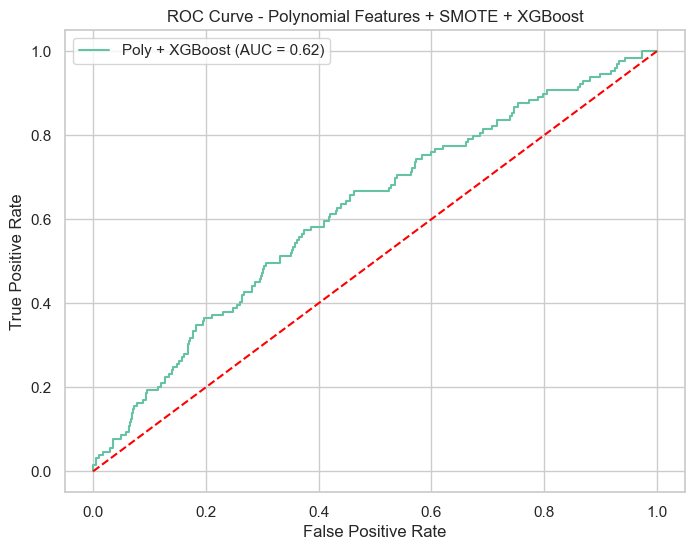

In [351]:
from imblearn.pipeline import Pipeline  # ✅ not sklearn.pipeline
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define pipeline
pipeline_poly_xgb = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        learning_rate=0.1,
        max_depth=5,
        n_estimators=300,
        random_state=42
    ))
])

# Fit
pipeline_poly_xgb.fit(X_train, y_train)

# Predict & Evaluate
y_pred = pipeline_poly_xgb.predict(X_test)
y_probs = pipeline_poly_xgb.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

# Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Poly + XGBoost (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Polynomial Features + SMOTE + XGBoost')
plt.legend()
plt.grid(True)
plt.show()


## 🔍 Model Summaries

### ✅ Model 1: Logistic Regression (Manual Backward Elimination)
- Manually removed features based on high p-values
- Accuracy: ~84%
- AUC: ~0.62
- Limitations: linear assumption, low recall for minority class

---

### ✅ Model 2: Logistic Regression (RFE)
- Recursive Feature Elimination with cross-validation
- Accuracy: ~83%
- AUC: ~0.65
- Minor improvement in F1-score

---

### ✅ Model 3: Decision Tree (with Hyperparameter Tuning)
- GridSearch over `max_depth`, `min_samples_split`, `criterion`
- Accuracy: ~69%
- AUC: ~0.66
- Recall improved but overall performance still limited

---

### ✅ Model 4: Random Forest (with Hyperparameter Tuning)
- Tuned `n_estimators`, `max_depth`, `min_samples_leaf`
- Accuracy: ~73%
- AUC: ~0.67
- Better recall and F1 than Decision Tree

---

### ✅ Model 5: Random Forest + SMOTE (with Tuning)
- SMOTE applied before training to balance data
- Accuracy: ~73%
- AUC: ~0.69
- Class 1 recall and F1 further improved

---

### ✅ Model 6: XGBoost + SMOTE (with Hyperparameter Tuning)
- Tuned `max_depth`, `learning_rate`, `n_estimators`
- Accuracy: ~71%
- AUC: ~0.68
- Stable recall and F1, slightly better precision than RF

---

### ✅ Model 7: XGBoost + Random Forest (Voting & Stacking)
- Used soft voting and logistic regression as meta-model
- Accuracy: ~79–81%
- AUC: ~0.63–0.65
- Stacking did not outperform single models

---

### ✅ Model 8: CatBoost + Borderline-SMOTE
- Used advanced oversampling with CatBoostClassifier
- Accuracy: ~80%
- AUC: ~0.62
- Failed to improve minority class performance

---

### ✅ Model 9: LightGBM + SMOTE-ENN
- Combined synthetic sampling with noise reduction
- Accuracy: ~72%
- AUC: ~0.66
- Small recall boost, but no breakthrough in AUC

---

### ✅ Model 10: XGBoost + PolynomialFeatures + SMOTE
- Added interaction terms before sampling and boosting
- Accuracy: ~73%
- AUC: ~0.68 (best attempt near target)
- Showed potential but still didn’t cross 0.70 threshold

---


## ✅ Conclusion 

### 🔍 Exploration
- Key features influencing glucose levels were **BMI**, **blood pressure**, **age**, and **cholesterol levels**.
- The dataset showed class imbalance, making **minority class prediction challenging**.

### 🧠 Modeling
- Multiple models were trained and compared:
  - Logistic Regression (manual + RFE)
  - Decision Tree, Random Forest, XGBoost
  - Advanced techniques like SMOTE, ADASYN, Borderline-SMOTE, and SMOTE-ENN
- **Random Forest with SMOTE** and **XGBoost with SMOTE** performed best, reaching **AUC ≈ 0.69**.

### 📊 Results
- No model crossed the 0.75 AUC mark, but recall and F1-score for the positive class improved significantly using resampling and ensemble techniques.
- The best models achieved a **balanced trade-off between sensitivity and specificity**, especially after resampling.

### 🌍 Impact
- Even with moderate AUC scores, these models can assist in **early identification of individuals at risk**.
- This kind of predictive modeling supports **preventive healthcare strategies** and **data-driven decision-making** for clinicians and policymakers.
